In [92]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense

In [93]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [94]:
activity_data = pd.read_csv("Outputs/output_file_acc.csv")
activity_data.head()
activity_data.Profile = pd.Categorical(activity_data.Profile)
activity_data['Profile_code'] = activity_data.Profile.cat.codes

clean_data = activity_data.drop("Profile", axis=1)
clean_data = clean_data.drop("Date_time", axis=1)

clean_data.head()

,X,Y,Z,ts,Activity,Profile_code
0,0.190048,-0.078262,-0.986176,1578568648,stand,3
1,0.140366,-0.068359,-0.998215,1578568648,stand,3
2,0.003952,-0.032806,-0.969467,1578568648,stand,3
3,-0.010345,0.084564,-0.947189,1578568648,stand,3
4,0.116348,-0.303986,-1.067520,1578568648,stand,3


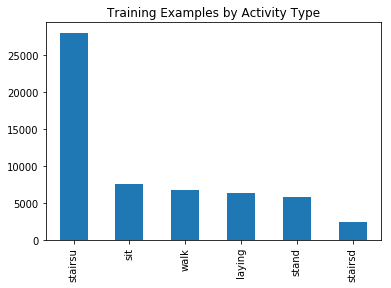

In [50]:
# Show how many training examples exist for each of the six activities
clean_data['Activity'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')
plt.show()

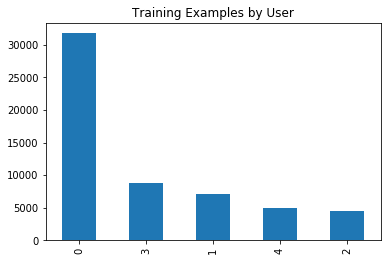

In [51]:
# Better understand how the recordings are spread across the different
# users who participated in the study
clean_data['Profile_code'].value_counts().plot(kind='bar',
                                  title='Training Examples by User')
plt.show()

In [95]:
# Define column name of the label vector
#stand =4
#stairsd =2
#stairsu = 3
#laying = 0
#sit = 1
#walk = 5
clean_data.Activity = pd.Categorical(clean_data.Activity)
clean_data['Activity_code'] = clean_data.Activity.cat.codes
df = clean_data[['Activity','Activity_code']]
df.loc[df['Activity_code'] ==5]
clean_data1 = clean_data.drop("Activity", axis=1) 
clean_data1
df.loc[df['Activity_code'] ==3]

,Activity,Activity_code
5709,stairsu,3
5710,stairsu,3
5711,stairsu,3
5712,stairsu,3
5713,stairsu,3
5714,stairsu,3
5715,stairsu,3
5716,stairsu,3
5717,stairsu,3
5718,stairsu,3


In [53]:
df_test = clean_data[clean_data['Profile_code'] > 3]
df_train = clean_data[clean_data['Profile_code'] <= 3]
#df_train = clean_data

In [54]:
x_train_df = df_train[["X","Y","Z","ts","Profile_code"]]
x_train_df 
X_train = x_train_df.values
X_train

array([[ 1.90048000e-01, -7.82620000e-02, -9.86176000e-01,
         1.57856865e+09,  3.00000000e+00],
       [ 1.40366000e-01, -6.83590000e-02, -9.98215000e-01,
         1.57856865e+09,  3.00000000e+00],
       [ 3.95200000e-03, -3.28060000e-02, -9.69467000e-01,
         1.57856865e+09,  3.00000000e+00],
       ...,
       [-1.78360000e-01,  1.25443000e-01, -9.65302000e-01,
         1.57857603e+09,  2.00000000e+00],
       [-2.56714000e-01,  1.32019000e-01, -9.20105000e-01,
         1.57857603e+09,  2.00000000e+00],
       [-3.57101000e-01,  1.49612000e-01, -9.38354000e-01,
         1.57857603e+09,  2.00000000e+00]])

In [55]:
y_train_df = df_train["Activity_code"]
y_train_df
y_train = to_categorical(y_train_df)
y_train[:10]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [56]:
 # Read the testing data
X_test_df = df_test[["X","Y","Z","ts","Profile_code"]]
X_test = X_test_df.values
X_test.shape

(5044, 5)

In [57]:
# Read the testing labels
y_test_df = df_test["Activity_code"]
# One-hot encode the integer labels
y_test = to_categorical(y_test_df)
y_test.shape



(5044, 6)

In [96]:
# Create an empty sequential model
model = Sequential()

In [97]:
# Add the first layer where the input dimensions are the 561 columns of the training data
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

In [98]:
model.add(Dense(100, activation='relu'))

In [99]:
# The output layer has 13 columns that are one-hot encoded
y_train.shape

(52025, 6)

In [100]:
model.add(Dense(100, activation='relu'))

In [101]:
model.add(Dense(100, activation='relu'))

In [102]:
# Add output layer
model.add(Dense(y_train.shape[1], activation="softmax"))

In [103]:
 # Compile the model using categorical_crossentropy for the loss function, the adam optimizer,
# and add accuracy to the training metrics
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [104]:
# Use the training data to fit (train) the model
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
52025/52025 - 4s - loss: 1713982.5837 - acc: 0.3252
Epoch 2/100
52025/52025 - 3s - loss: 70179.7888 - acc: 0.3277
Epoch 3/100
52025/52025 - 3s - loss: 10268.9431 - acc: 0.4048
Epoch 4/100
52025/52025 - 3s - loss: 1.4208 - acc: 0.5276
Epoch 5/100
52025/52025 - 3s - loss: 1.4179 - acc: 0.5276
Epoch 6/100
52025/52025 - 4s - loss: 1.4178 - acc: 0.5276
Epoch 7/100
52025/52025 - 4s - loss: 1.4178 - acc: 0.5276
Epoch 8/100
52025/52025 - 3s - loss: 1.4178 - acc: 0.5276
Epoch 9/100
52025/52025 - 3s - loss: 1.4178 - acc: 0.5276
Epoch 10/100
52025/52025 - 5s - loss: 1.4178 - acc: 0.5276
Epoch 11/100
52025/52025 - 3s - loss: 1.4178 - acc: 0.5276
Epoch 12/100
52025/52025 - 3s - loss: 1.4178 - acc: 0.5276
Epoch 13/100
52025/52025 - 3s - loss: 1.4178 - acc: 0.5276
Epoch 14/100
52025/52025 - 3s - loss: 1.4179 - acc: 0.5276
Epoch 15/100
52025/52025 - 4s - loss: 1.4179 - acc: 0.5276
Epoch 16/100
52025/52025 - 5s - loss: 1.4179 - acc: 0.5276
Epoch 17/100
52025/52025 - 4s - loss: 1.4179 - acc:

In [105]:
# Save the model
model.save("smartphone_trained.h5")

In [106]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("smartphone_trained.h5")

In [109]:
# Evaluate the model using the training data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5044/5044 - 0s - loss: 2.1604 - acc: 0.1223
Loss: 2.1604483840391806, Accuracy: 0.12232355028390884


In [87]:
# Grab just one data point to test with
test = np.expand_dims(X_test[0], axis=0)
test.shape

(1, 5)

In [91]:
df_test

,X,Y,Z,ts,Activity,Profile_code,Activity_code
47546,-0.433777,-0.842545,-0.322769,1578594935,stand,4,4
47547,-0.443207,-0.849686,-0.307556,1578594935,stand,4,4
47548,-0.433167,-0.844559,-0.314667,1578594935,stand,4,4
47549,-0.397507,-0.851089,-0.307800,1578594935,stand,4,4
47550,-0.373840,-0.853729,-0.264847,1578594935,stand,4,4
47551,-0.398605,-0.855621,-0.305389,1578594935,stand,4,4
47552,-0.534897,-0.817230,-0.170517,1578594936,stand,4,4
47553,-0.644028,-0.735794,-0.284256,1578594936,stand,4,4
47554,-0.681870,-0.655197,-0.369614,1578594936,stand,4,4
47555,-0.556976,-0.812241,-0.322922,1578594936,stand,4,4


In [88]:
# Make a prediction. The result should be 5 - STANDING
print(f"Predicted class: {model.predict_classes(test)}")

Predicted class: [3]


In [65]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               600       
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 606       
Total params: 11,306
Trainable params: 11,306
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

In [83]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2)
                      

Epoch 1/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 2/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 3/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 4/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 5/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 6/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 7/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 8/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 9/100
52025/52025 - 3s - loss: 1.4177 - acc: 0.5276
Epoch 10/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 11/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 12/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 13/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 14/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 15/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 16/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 17/100
52025/52025 - 2s - loss: 1.4177 - acc: 0.5276
Epoch 

KeyError: 'val_acc'

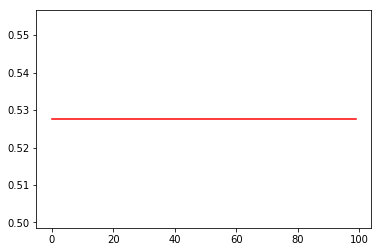

In [82]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()